In [111]:
import pandas as pd

## odczytaj za pomocą pd ilu jest ślązaków

In [112]:
narodowosci=pd.read_html("https://pl.wikipedia.org/wiki/Polska",match="Narodowość")
narodowosci=narodowosci[0]
narodowosci

Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]  \
                                                                      Narodowość   
0                                              Polacy                              
1                                          Ślązacy[e]                              
2                                          Kaszubi[e]                              
3                                              Niemcy                              
4                                            Ukraińcy                              
5                                         Białorusini                              
6                                             Romowie                              
7                                            Rosjanie                              
8                                       Amerykanie[e]                              
9                                            Łemkowie                              
10                                         Anglicy[e]                              
11                                          Pozostali                              
12                                     Ludność ogółem                              

                                                                               
   Liczba (w tys.)(w tym jako jedyna)           Udział Różnica z 2002(w tys.)  
0                     37 394 (36 522)  97,10% (94,83%)                    410  
1                           847 (376)    2,20% (0,98%)                    674  
2                            233 (16)    0,61% (0,04%)                    228  
3                            148 (45)    0,38% (0,12%)                      5  
4                             51 (28)    0,13% (0,07%)                     20  
5                             47 (30)    0,12% (0,08%)                      2  
6                             17 (10)    0,04% (0,03%)                      4  
7                              13 (5)    0,03% (0,01%)                      7  
8                              12 (1)   0,03% (0,003%)                     10  
9                              11 (6)    0,03% (0,02%)                      5  
10                             10 (1)   0,03% (0,003%)                      9  
11                      549 (1472[i])    1,43% (3,82%)                    259  
12                             38 512      x[j] (100%)                    282

In [113]:
print("w Polsce jest "+str(narodowosci[('Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]', 'Liczba (w tys.)(w tym jako jedyna)')][1][:4]+"tysięcy Ślązaków"))

w Polsce jest 847 tysięcy Ślązaków


## 2. Posortuj Narodowość rosnąco według liczba

In [114]:
narodowosci.iloc[:,1]=narodowosci.iloc[:,1].str.split("(").str[0]
narodowosci.iloc[:,1].replace(' ','',inplace=True,regex=True)

In [115]:
narodowosci.dtypes

Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]  Narodowość                            object
                                                                               Liczba (w tys.)(w tym jako jedyna)    object
                                                                               Udział                                object
                                                                               Różnica z 2002(w tys.)                 int64
dtype: object

In [116]:
narodowosci.iloc[:,1]=narodowosci.iloc[:,1].astype('int')

In [117]:
narodowosci_sortowanie=narodowosci.iloc[:,:2]
narodowosci_sortowanie.sort_values([('Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]', 'Liczba (w tys.)(w tym jako jedyna)')])


Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]  \
                                                                      Narodowość   
10                                         Anglicy[e]                              
9                                            Łemkowie                              
8                                       Amerykanie[e]                              
7                                            Rosjanie                              
6                                             Romowie                              
5                                         Białorusini                              
4                                            Ukraińcy                              
3                                              Niemcy                              
2                                          Kaszubi[e]                              
11                                          Pozostali                              
1                                          Ślązacy[e]                              
0                                              Polacy                              
12                                     Ludność ogółem                              

                                       
   Liczba (w tys.)(w tym jako jedyna)  
10                                 10  
9                                  11  
8                                  12  
7                                  13  
6                                  17  
5                                  47  
4                                  51  
3                                 148  
2                                 233  
11                                549  
1                                 847  
0                               37394  
12                              38512

## pokaż, które narodowości mają większy udział niż 0,03%

In [120]:
import numpy as np
narodowosci.iloc[:,2]=narodowosci.iloc[:,2].str.split("%").str[0]
#narodowosci.iloc[:,2].replace(' ','',inplace=True,regex=True)
narodowosci.iloc[:,2].replace({'x':np.nan,',':'.'},inplace=True,regex=True)
narodowosci

Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]  \
                                                                      Narodowość   
0                                              Polacy                              
1                                          Ślązacy[e]                              
2                                          Kaszubi[e]                              
3                                              Niemcy                              
4                                            Ukraińcy                              
5                                         Białorusini                              
6                                             Romowie                              
7                                            Rosjanie                              
8                                       Amerykanie[e]                              
9                                            Łemkowie                              
10                                         Anglicy[e]                              
11                                          Pozostali                              
12                                     Ludność ogółem                              

                                                                     
   Liczba (w tys.)(w tym jako jedyna) Udział Różnica z 2002(w tys.)  
0                               37394  97.10                    410  
1                                 847   2.20                    674  
2                                 233   0.61                    228  
3                                 148   0.38                      5  
4                                  51   0.13                     20  
5                                  47   0.12                      2  
6                                  17   0.04                      4  
7                                  13   0.03                      7  
8                                  12   0.03                     10  
9                                  11   0.03                      5  
10                                 10   0.03                      9  
11                                549   1.43                    259  
12                              38512    NaN                    282

In [127]:
narodowosci.iloc[:,2]=pd.to_numeric(narodowosci.iloc[:,2])

In [129]:
narodowosci[narodowosci.iloc[:,2]>0.03]

Struktura narodowo-etniczna w Polsce według spisu ludności z 2011 r.[99][100]  \
                                                                      Narodowość   
0                                              Polacy                              
1                                          Ślązacy[e]                              
2                                          Kaszubi[e]                              
3                                              Niemcy                              
4                                            Ukraińcy                              
5                                         Białorusini                              
6                                             Romowie                              
11                                          Pozostali                              

                                                                     
   Liczba (w tys.)(w tym jako jedyna) Udział Różnica z 2002(w tys.)  
0                               37394  97.10                    410  
1                                 847   2.20                    674  
2                                 233   0.61                    228  
3                                 148   0.38                      5  
4                                  51   0.13                     20  
5                                  47   0.12                      2  
6                                  17   0.04                      4  
11                                549   1.43                    259

## wyświetl wykres kołowy Narodowości

([<matplotlib.patches.Wedge at 0x2492627be20>,
 [Text(-1.0868474436650828, 0.16959550170530777, 'Polacy'),
  Text(1.0679632104427554, -0.26354237067462777, 'Ślązacy[e]'),
  Text(1.0866980281786853, -0.17055027280118104, 'Kaszubi[e]'),
  Text(1.091384236544273, -0.13740614332217777, 'Niemcy'),
  Text(1.0934303325527304, -0.1200421086686895, 'Ukraińcy'),
  Text(1.094336469378269, -0.11147955771667369, 'Białorusini'),
  Text(1.0948920427763909, -0.10588396793160909, 'Romowie'),
  Text(1.0951426195505238, -0.10326007381372962, 'Rosjanie'),
  Text(1.0953466301608439, -0.1010730418820153, 'Amerykanie[e]'),
  Text(1.0955304625059936, -0.09906061639927315, 'Łemkowie'),
  Text(1.0956950804058594, -0.09722289223427377, 'Anglicy[e]'),
  Text(1.0989425917350988, -0.04822012101337115, 'Pozostali')])

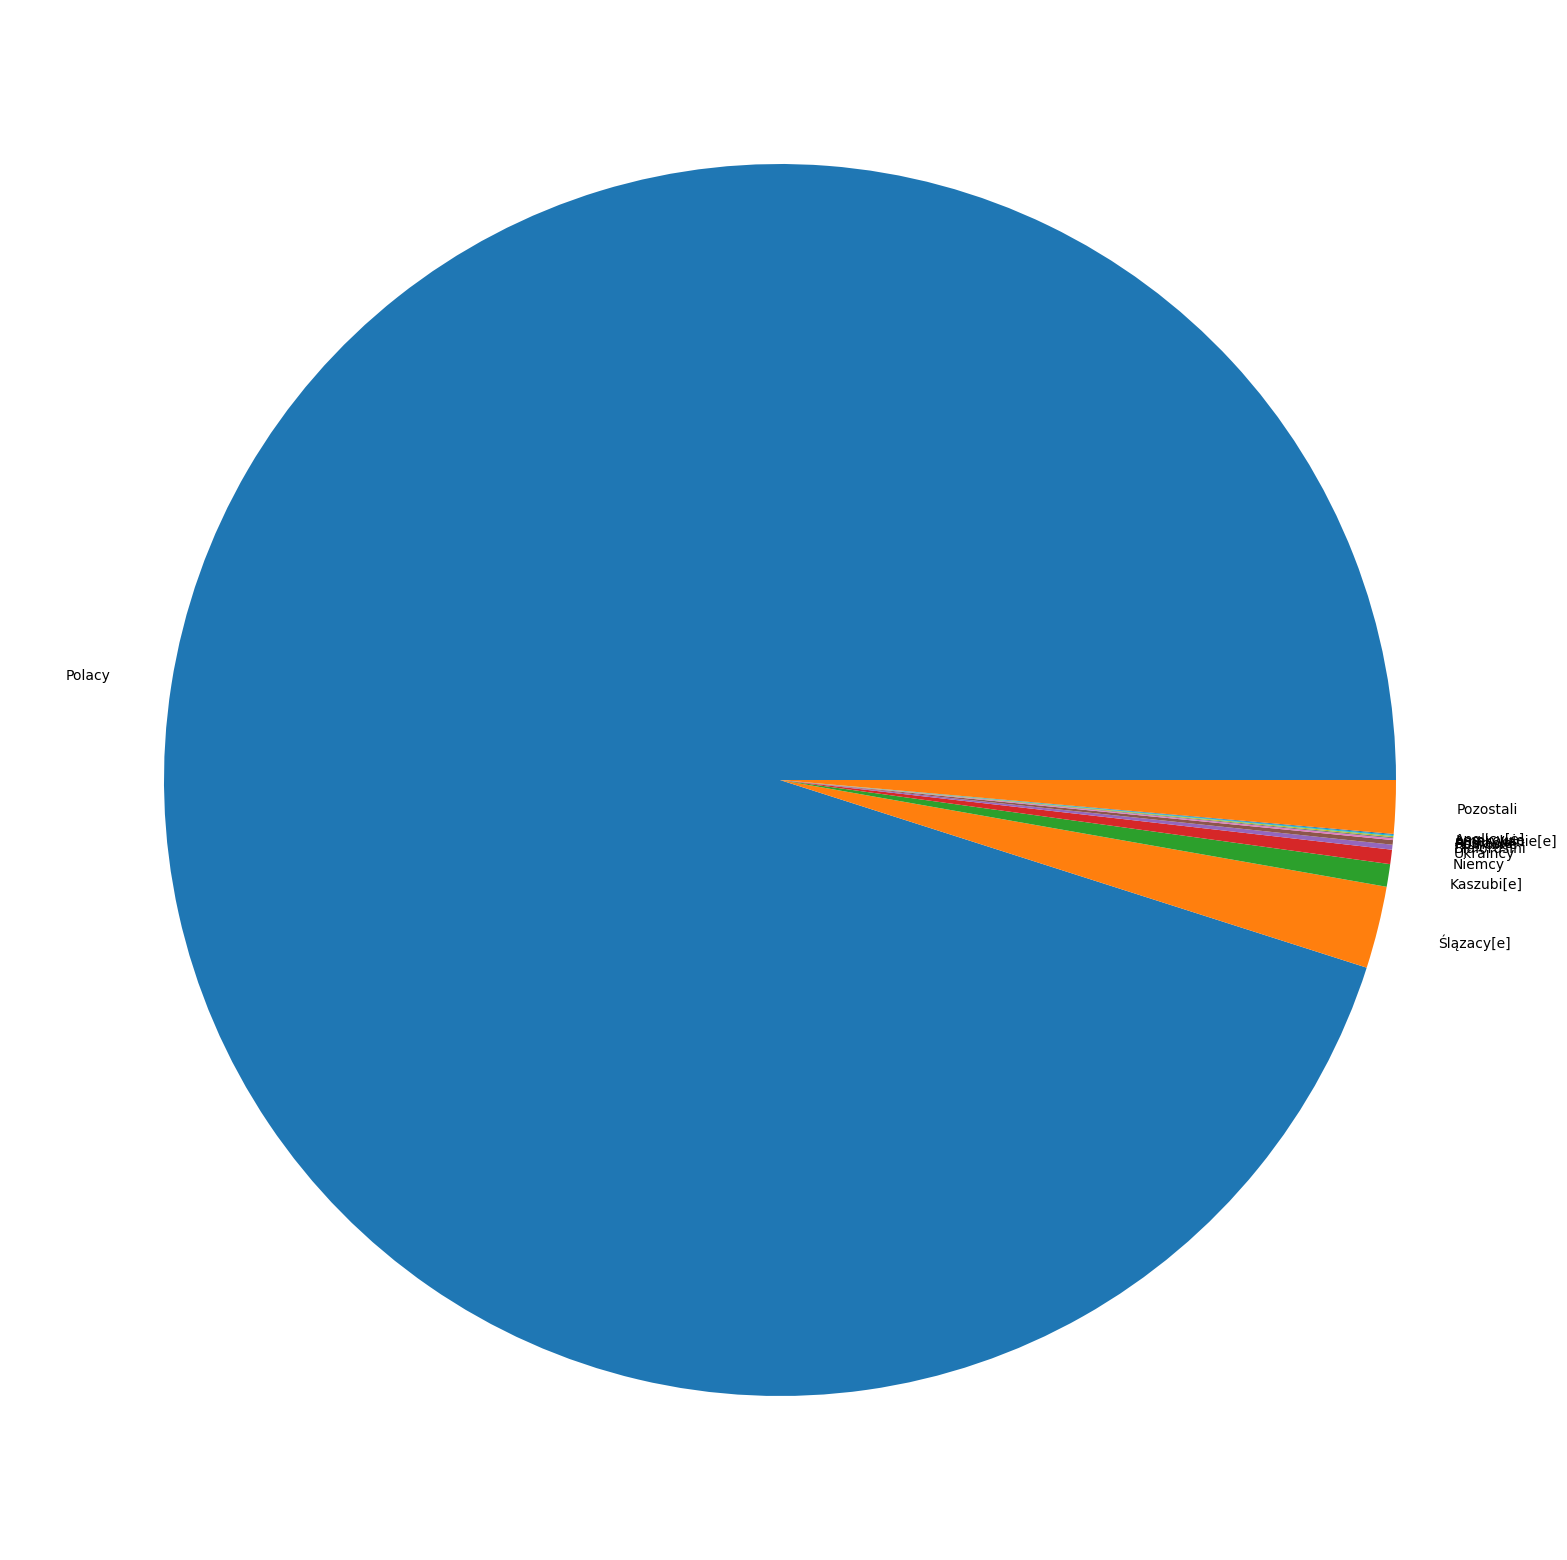

In [145]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(20, 20))
plt.pie(narodowosci.iloc[:12,1],labels=narodowosci.iloc[:12,0])

In [154]:
import plotly.graph_objs as go
fig=go.Figure(data=[go.Pie(labels=narodowosci.iloc[:12,0], values=narodowosci.iloc[:12,1], 
                     name="narodowosci")])
fig.update_layout(title="Narodowości",font=dict(size=13),title_x=0.9, title_y=0.7)
fig.show()